<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metodo montecarlo \\
Muestreo de importancia
$g = \int_{0}^{1} \cos\left(\frac{\pi x}{2}\right) \, dx$ \\
con las series de Taylor: $y = \frac{3}{2} \left( 1 - x^2 \right)$


In [3]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import time

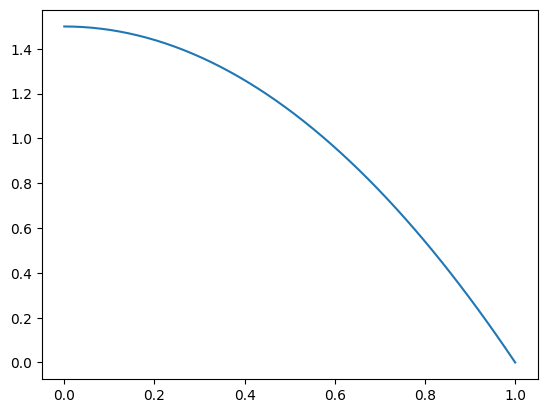

In [4]:
x = np.linspace(0, 1, 50)
y= 3/2*(1-x**2)
plt.plot(x,y)
plt.show()

In [5]:
#El siguiente código muestra histograma
def funcion(n=100):
    list=[]
    for i in range(n):
        y=rd.uniform(0,1)
        U=rd.uniform(0,1)
        f=3/2*(1-y**2)
        c=3/2
        if f/c>=U: #condicion para regresar x, paso 3
         x=y
         list.append(x)
    return list


Varianza de la lista: 0.05976148778672321
Tiempo de ejecución: 0.19295191764831543 segundos


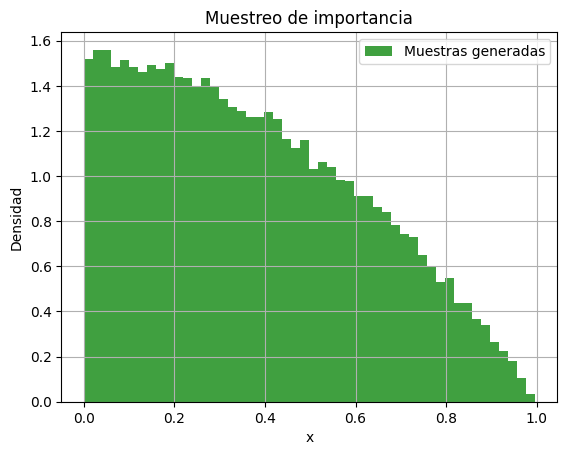

In [14]:
# Iniciar cronómetro
inicia = time.time()
histograma = funcion(100000)
variance = np.var(histograma) # Calcular la varianza de la lista
print(f'Varianza de la lista: {variance}')
t_total = time.time() - inicia # Medir el tiempo de ejecución
print(f'Tiempo de ejecución: {t_total} segundos')

# Crear el histograma
plt.hist(histograma, bins=50, density=True, alpha=0.75, color='green', label="Muestras generadas")

# Etiquetas y título
plt.xlabel('x')
plt.ylabel('Densidad')
plt.title('Muestreo de importancia')
plt.legend()
plt.grid(True)
plt.show()


